In [1]:
# Import the different libraries:

import pandas as pd
import requests
import json
from bs4 import BeautifulSoup
import matplotlib as plt
import numpy as np

In [2]:
# Open the csv file from the nasa website: data/exoplanets/exoplanets.csv
exo_nasa = pd.read_csv("../data/nasa/exoplanet_nasa_eqt.csv")

In [3]:
# Open the csv file from the exoplanets website: data/exoplanets/exoplanets.csv
exo_eu = pd.read_csv("../data/exoplanets/exoplanets_eu.csv")

In [4]:
exo_eu = exo_eu.rename(columns={"# name" : "pl_name"})

In [5]:
exo_nasa["pl_name"] = (exo_nasa["pl_name"].str
                       .replace(" A ", " ")
                       .replace(" B ", " ")
                       .replace(" C ", " ")
                       .replace(" (AB) ", " ")
                       )

In [6]:
exo_eu["pl_name"] = (exo_eu["pl_name"].str
                     .replace(" A ", " ")
                     .replace(" B ", " ")
                     .replace(" C ", " ")
                     .replace(" (AB) ", " ")
                     )

In [7]:
exo_nasa = exo_nasa.set_index("pl_name")

In [8]:
exo_eu = exo_eu.set_index("pl_name")

In [9]:
exo_nasa = exo_nasa.join(exo_eu, how="left", lsuffix='pl_name', rsuffix='pl_name')

In [10]:
exo_nasa.to_csv("../data/combined/main_frame.csv")

In [11]:
# Plotting and creating figure of all known exoplanets

In [12]:
df_all = exo_nasa.copy()

In [13]:
df_all = df_all[["st_mass", "pl_orbper"]]

In [14]:
len(df_all)

4144

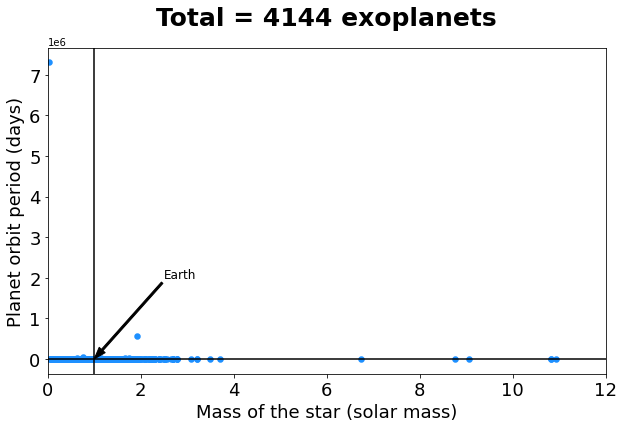

In [15]:
plot_all = df_all.plot.scatter(x="st_mass", 
                        y="pl_orbper",
                        c="dodgerblue",
                        figsize=(10,6),
                        xlim=(0,12),
                        fontsize=18,
                        linewidth=2)

plot_all.set_xlabel("Mass of the star (solar mass)").set_fontsize(18)
plot_all.set_ylabel("Planet orbit period (days)").set_fontsize(18)
plot_all.axhline(y=365, xmin=0, xmax=1, color="black")
plot_all.axvline(x=1, ymin=0, ymax=1, color="black")
plot_all.set_facecolor("white")
plot_all.set_title(f"Total = {len(df_all)} exoplanets", fontsize=25, fontweight='bold').set_position([.5, 1.05])
plot_all.annotate("Earth", xy=(1,365), xytext=(2.5, 2000000), fontsize=12, arrowprops=dict(facecolor='black', width=2, headwidth=8))

fig_all = plot_all.get_figure()

In [16]:
fig_all.savefig("../Figures/fig_all.png", dpi=600)

In [17]:
# That is ugly and uninformative 

In [18]:
# Plotting and creating Fig 1

In [19]:
df_1 = exo_nasa.copy()

In [20]:
df_1 = df_1[df_1.pl_orbper < 7000]

In [21]:
df_1 = df_1[df_1.st_mass < 4]

In [22]:
len(df_1)

3232

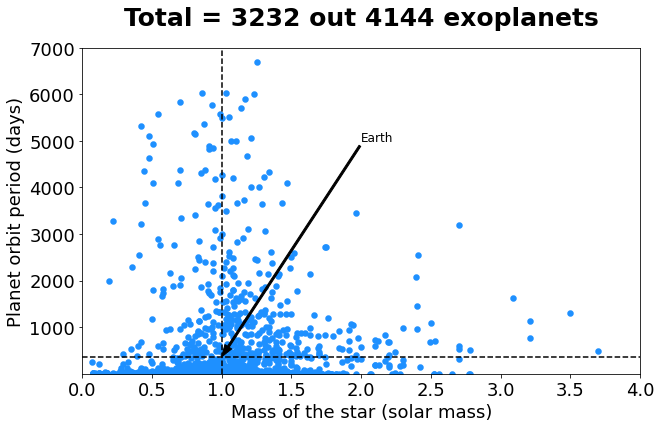

In [23]:
plot_1 = df_1.plot.scatter(x="st_mass", 
                        y="pl_orbper",
                        c="dodgerblue",
                        figsize=(10,6),
                        xlim=(0,4),
                        ylim=(0.0001,7000),
                        fontsize=18,
                        linewidth=2)

plot_1.set_xlabel("Mass of the star (solar mass)").set_fontsize(18)
plot_1.set_ylabel("Planet orbit period (days)").set_fontsize(18)
plot_1.axhline(y=365, xmin=0, xmax=1, color="black", ls='--')
plot_1.axvline(x=1, ymin=0, ymax=1, color="black", ls='--')
plot_1.set_facecolor("white")
plot_1.set_title(f"Total = {len(df_1)} out {len(df_all)} exoplanets", fontsize=25, fontweight='bold').set_position([0.5, 1.05])
plot_1.annotate("Earth", xy=(1,365), xytext=(2, 5000), fontsize=12, arrowprops=dict(facecolor='black', width=2, headwidth=8))

fig_1 = plot_1.get_figure()

In [24]:
fig_1.savefig("../Figures/fig_1.png", dpi=600)

In [25]:
# Plotting and creating Fig 2

In [26]:
df_2 = exo_nasa.copy()

In [27]:
mar_pl_obper = 0.2

In [28]:
df_2 = df_2[df_2.pl_orbper < 365+365*mar_pl_obper]

In [29]:
df_2 = df_2[df_2.pl_orbper > 365-365*mar_pl_obper]

In [30]:
mar_st_mass = 0.2

In [31]:
df_2 = df_2[df_2.st_mass < 1+1*mar_st_mass]

In [32]:
df_2 = df_2[df_2.st_mass > 1-1*mar_st_mass]

In [33]:
len(df_2)

22

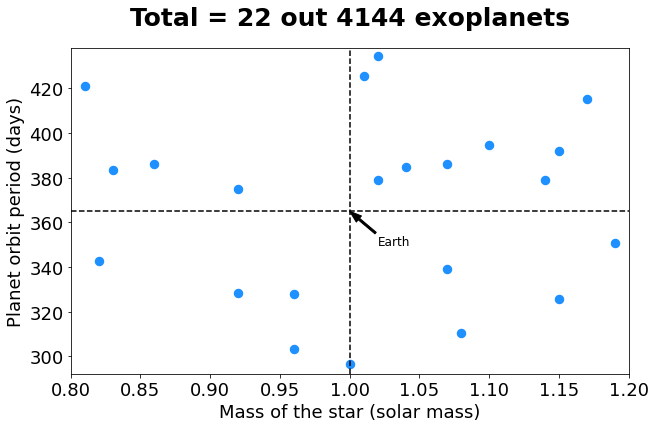

In [34]:
plot_2 = df_2.plot.scatter(x="st_mass", 
                        y="pl_orbper",
                        c="dodgerblue",
                        figsize=(10,6),
                        xlim=(0.8,1.20),
                        ylim=(365.25*0.8,365.25*1.2),
                        fontsize=18,
                        linewidth=5)

plot_2.set_xlabel("Mass of the star (solar mass)").set_fontsize(18)
plot_2.set_ylabel("Planet orbit period (days)").set_fontsize(18)
plot_2.axhline(y=365, xmin=0, xmax=1, color="black", ls='--')
plot_2.axvline(x=1, ymin=0, ymax=1, color="black", ls='--')
plot_2.set_facecolor("none")
plot_2.set_title(f"Total = {len(df_2)} out {len(df_all)} exoplanets", fontsize=25, fontweight='bold').set_position([.5, 1.05])
plot_2.annotate("Earth", xy=(1,365), xytext=(1.02, 350), fontsize=12, arrowprops=dict(facecolor='black', width=2, headwidth=8))

fig_2 = plot_2.get_figure()

In [35]:
fig_2.savefig("../Figures/fig_2.png", dpi=600)